### Today:
* Neural Networks
    * Neuron 
    * Arhitecture
    * Activation functions
    * Cost function
    * Feed-forward
    * Backpropagation
  
### Resources:
* http://neuralnetworksanddeeplearning.com/
* http://karpathy.github.io/neuralnets/
* http://ufldl.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/
* https://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/
* http://adventuresinmachinelearning.com/python-tensorflow-tutorial/
* https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/multilayer_perceptron.py

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets("../../data/05_kNN/MNIST_data/", one_hot=True)

Extracting ../../data/05_kNN/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../data/05_kNN/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../data/05_kNN/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../data/05_kNN/MNIST_data/t10k-labels-idx1-ubyte.gz


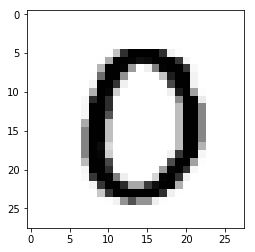

In [4]:
image = mnist.train.images[10].reshape((28, 28))
plt.imshow(image, cmap='Greys')

In [5]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

In [6]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784    # MNIST data input (img shape: 28*28)
n_classes = 10   # MNIST total classes (0-9 digits)

In [7]:
# Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

In [8]:
# Store layers weight & bias
weights = {
    'h1':  tf.Variable(tf.random_normal([n_input,    n_hidden_1])),
    'h2':  tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes ]))
}

biases = {
    'b1':  tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':  tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [9]:
# Hidden fully connected layer with 256 neurons
layer_1 = tf.add(tf.matmul(X, weights['h1']), biases['b1'])

# Hidden fully connected layer with 256 neurons
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])

# Output fully connected layer with a neuron for each class
hypothesis = tf.matmul(layer_2, weights['out']) + biases['out']

In [10]:
# Define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [11]:
# Optimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [12]:
# Predict
pred = tf.nn.softmax(hypothesis)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(training_epochs):
        
        avg_cost = 0.0
        
        total_batch = int(mnist.train.num_examples / batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, loss], feed_dict={X: batch_x, Y: batch_y})
            
            # Compute average loss
            avg_cost += c / total_batch
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print('Epoch: %04d, cost: %4.10f' % (epoch + 1, avg_cost))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001, cost: 252.2769311940
Epoch: 0002, cost: 98.8307684708
Epoch: 0003, cost: 74.7608049237
Epoch: 0004, cost: 61.0566481850
Epoch: 0005, cost: 52.5266070483
Epoch: 0006, cost: 45.9206814931
Epoch: 0007, cost: 41.3196097877
Epoch: 0008, cost: 37.8571086251
Epoch: 0009, cost: 34.3896262854
Epoch: 0010, cost: 32.0588042649
Epoch: 0011, cost: 29.6977715735
Epoch: 0012, cost: 28.0953365499
Epoch: 0013, cost: 26.3657097996
Epoch: 0014, cost: 25.0045427656
Epoch: 0015, cost: 23.7405572393
Accuracy: 0.8774
